# Лабораторная работа №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

## 1.	Загрузите данные в ноутбук

In [2]:
df = pd.read_excel("Вариант 3.xlsx", header=2, dtype={'№': int, '№ школы': int}, nrows=1180)
df = df.set_index("№")
df

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
...,...,...,...,...,...,...,...,...,...,...
1176,148,11,М,332,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51,98,36
1177,148,11,М,330,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51,98,36
1178,152,11,Ж,330,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51,98,36


## 2.	Сделайте описательную статистику по среднему баллу

In [3]:
df["Балл"].describe()["mean"]

52.047457627118646

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [4]:
res = round(df[df["Балл"] < df["Балл"].mean()].shape[0]/df.shape[0]*100, 2)
print(f"Процент учащихся, набравших меньше среднего = {res}%")


Процент учащихся, набравших меньше среднего = 56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [5]:
res_failed = round(df[df["Балл"] < df["Минимальный балл"]].shape[0]/df.shape[0]*100, 2)
print(f"Процент учащихся, не сдавших экзамен = {res_failed}%")


Процент учащихся, не сдавших экзамен = 7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

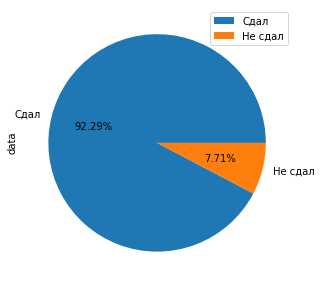

In [6]:
df_bool = pd.DataFrame({'data': [100-res_failed, res_failed]},
                  index=["Сдал", "Не сдал"])
df_bool.plot.pie(y='data', figsize=(5, 5), autopct='%.2f%%');

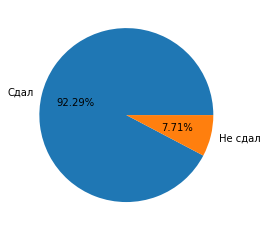

In [267]:
# plt.pie([100-res_failed,res_failed], labels=["Сдал", "Не сдал"], autopct='%.2f%%');

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

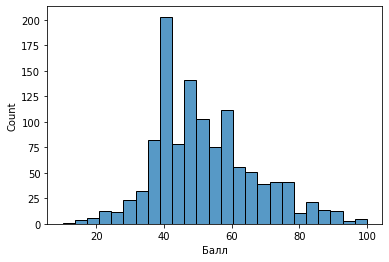

In [12]:
# df["Балл"].plot(kind="kde", legend=True, grid=True, figsize=(20, 10));
sns.histplot(df["Балл"], ax=plt.subplots()[1]);

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

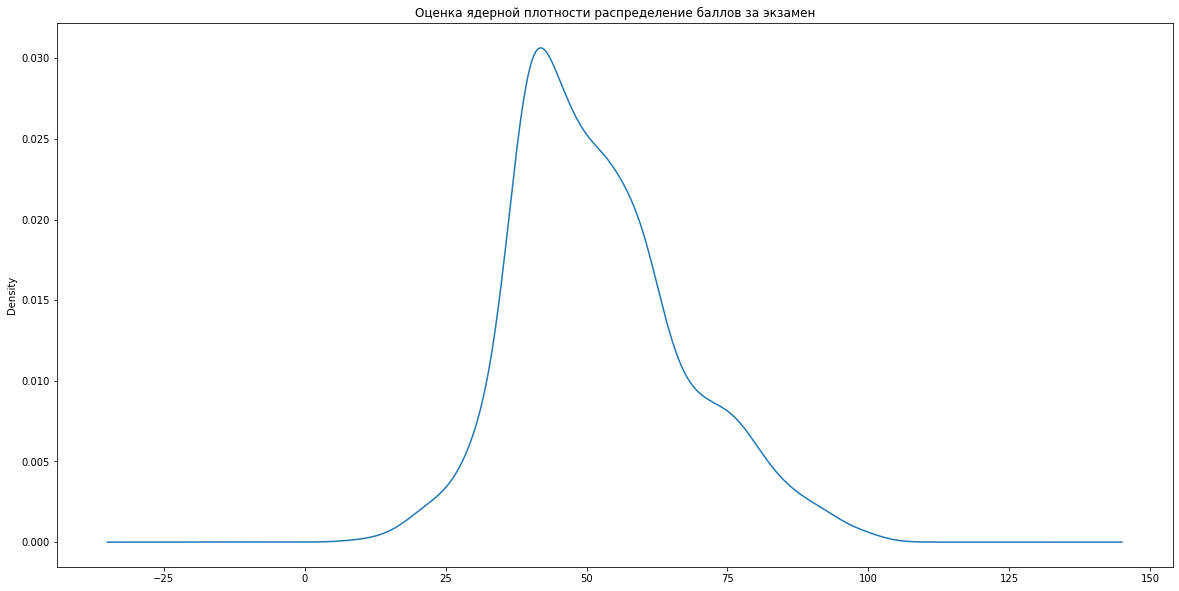

In [186]:
df["Балл"].plot(kind="kde", title="Оценка ядерной плотности распределение баллов за экзамен", figsize=(20, 10));

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [13]:
res = df["Балл"].shape[0]
D = df[df["Балл"] < 34]["Балл"].count()/res * 100  # неуд
C = df[(df["Балл"] > 34) & (df["Балл"] < 50)]["Балл"].count()/res * 100  # уд
B = df[(df["Балл"] > 50) & (df["Балл"] < 75)]["Балл"].count()/res * 100  # хор
A = df[(df["Балл"] > 75)]["Балл"].count()/res * 100  # отл
df_pie = pd.DataFrame([C, B, A, D])

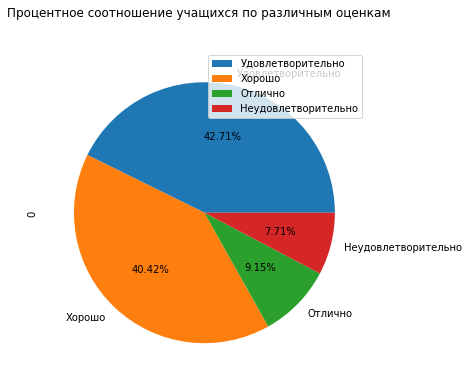

In [14]:
df_pie.plot(kind="pie", title="Процентное соотношение учащихся по различным оценкам",
            labels=["Удовлетворительно", "Хорошо", "Отлично", "Неудовлетворительно"], figsize=(6, 6), subplots=True, autopct='%.2f%%');


## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

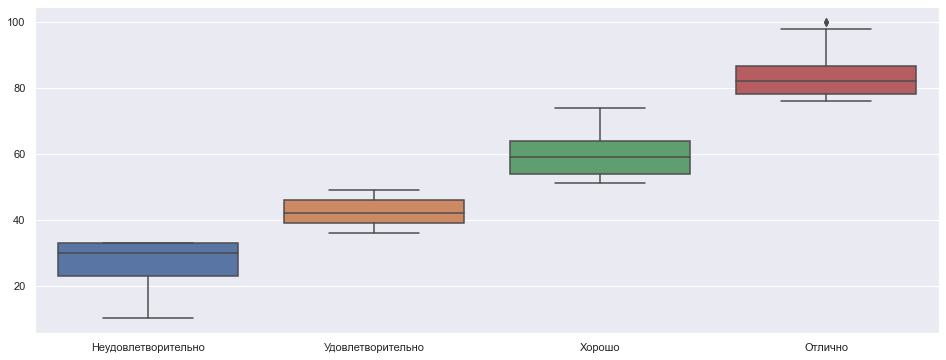

In [340]:
df_9 = pd.DataFrame({
    "Неудовлетворительно": df[df["Балл"] < 34]["Балл"], "Удовлетворительно": df[(df["Балл"] > 34) & (df["Балл"] < 50)]["Балл"], "Хорошо": df[(df["Балл"] > 50) & (
        df["Балл"] < 75)]["Балл"], "Отлично": df[(df["Балл"] > 75)]["Балл"]})
sns.set(rc={'figure.figsize':(16.2, 6)})
ax = sns.boxplot(data=df_9)


## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

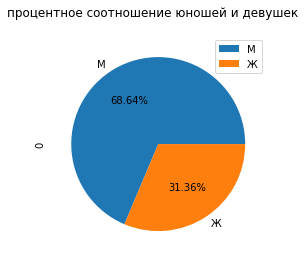

In [260]:
m_count = len(np.where(df["Пол"].values=="Ж")[0])
df_sex = pd.DataFrame([df["Пол"].count()-m_count, m_count])
df_sex.plot(kind="pie", title="процентное соотношение юношей и девушек", labels=["М", "Ж"], autopct='%.2f%%', subplots=True);


## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

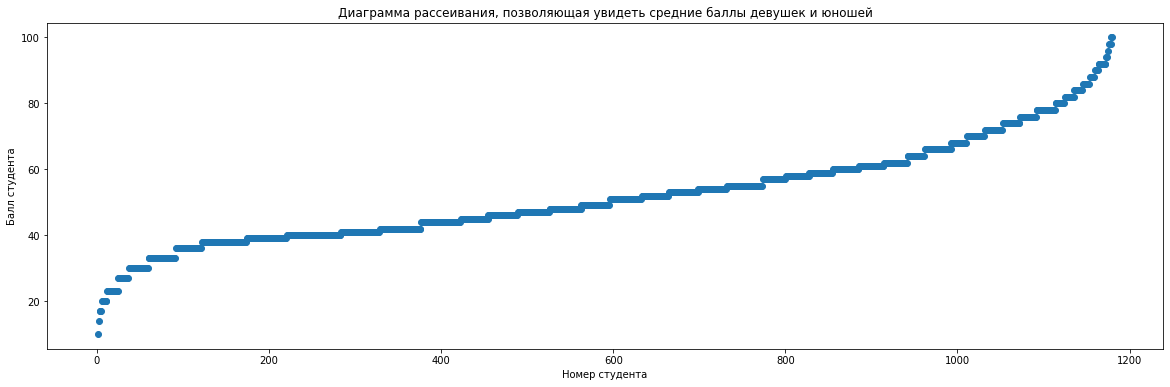

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(x = df.index, y = df['Балл'])
plt.xlabel("Номер студента")
plt.ylabel("Балл студента")
plt.title("Диаграмма рассеивания, позволяющая увидеть средние баллы девушек и юношей")
# TODO разделение на М и Ж
plt.show()

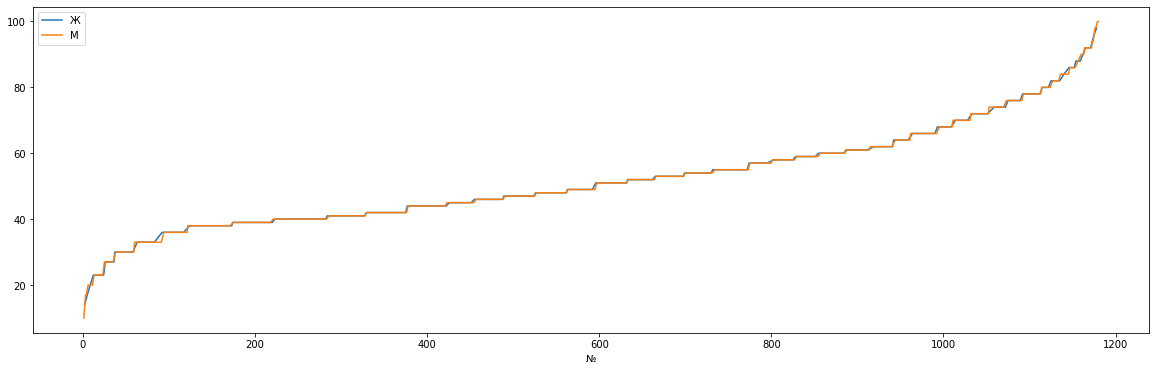

In [23]:
df.groupby("Пол")["Балл"].plot(figsize=(20,6), legend=True);

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [24]:
schools_count = df["№ школы"].unique().size
print(f"В экзамене принимало участие {schools_count} школ")

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

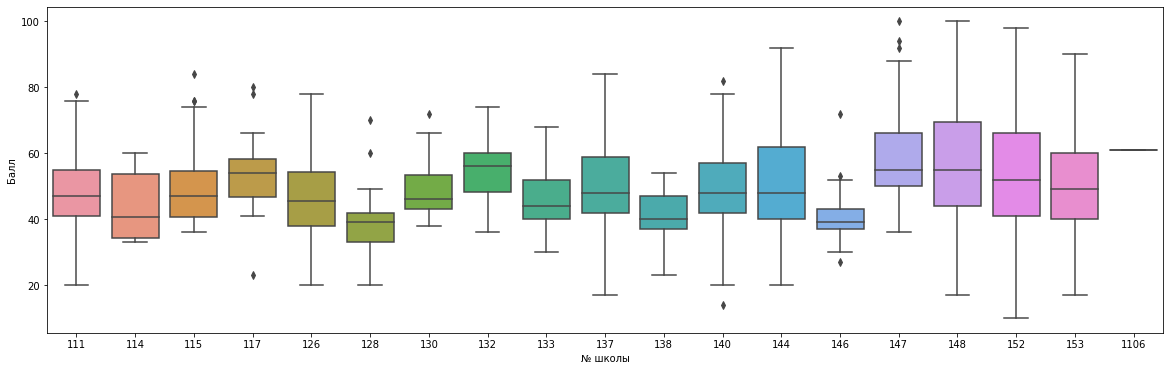

In [30]:
sns.boxplot(data=df, x="№ школы", y="Балл", ax=plt.subplots(figsize=(20, 6))[1]);

Выбросы в школах 111, 115, 117, 128, 130, 140, 146, 147

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [145]:
l1 = len(df["Задания с кратким ответом"].values[0])
l2 = len(df["Задания с развёрнутым ответом"].values[0])//4

print(f"Всего {l1} заданий с кратким ответов")
print(f"Всего {l2} заданий с развернутым ответов")

# Последнее выполненное задание

Всего 27 заданий с кратким ответов
Всего 5 заданий с развернутым ответов


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

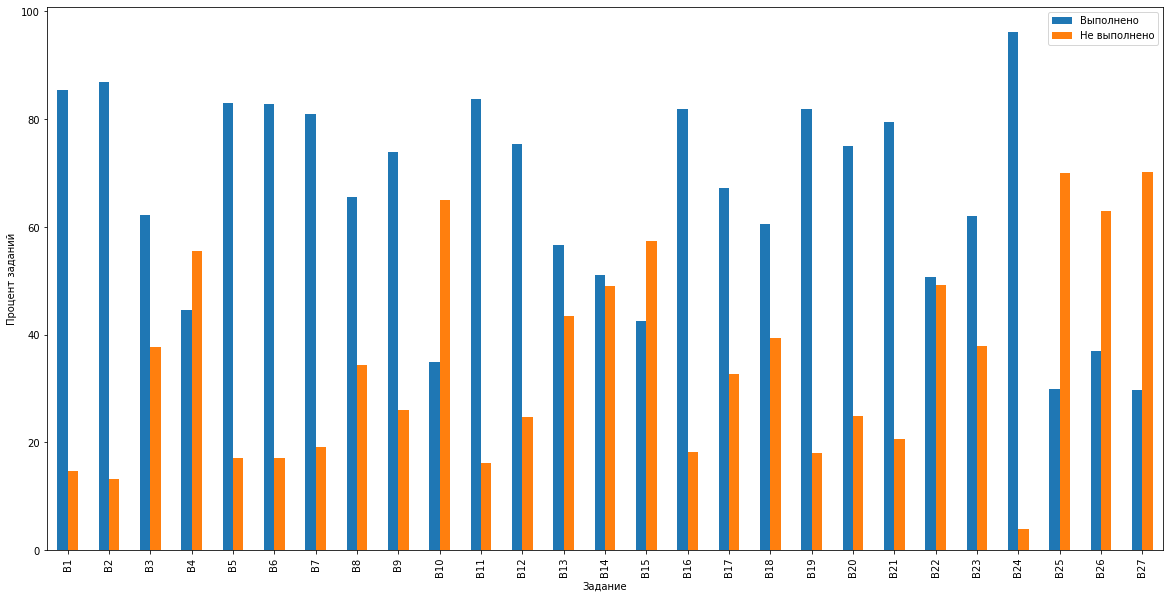

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

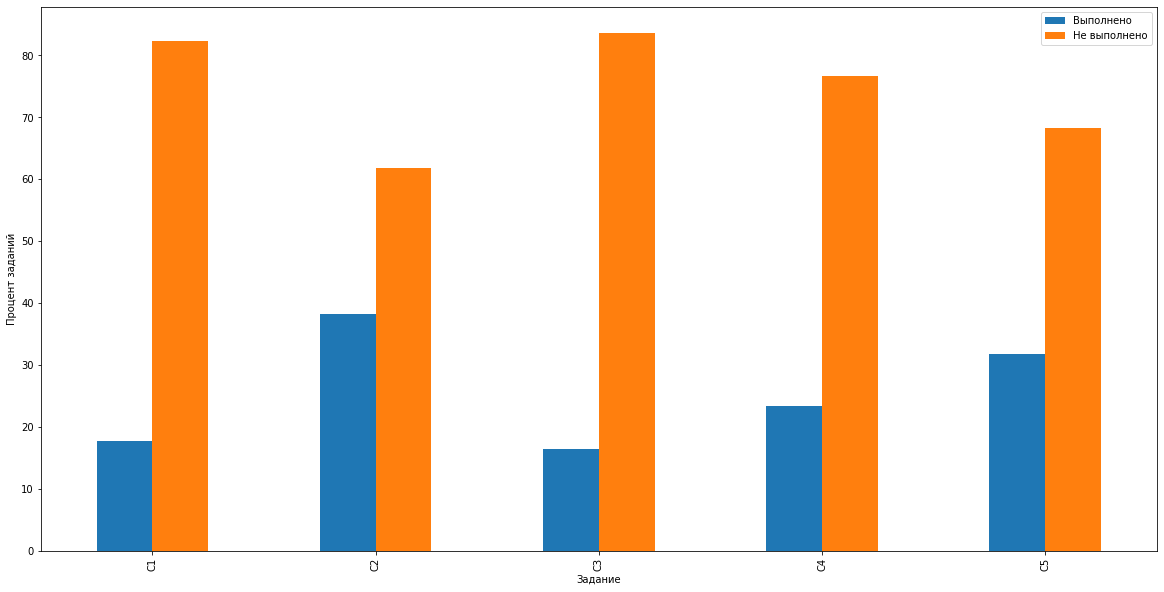

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


148     214
152     170
140     135
153     129
137      72
147      67
111      63
144      61
126      56
133      49
115      43
117      32
146      23
132      18
128      15
138      11
130      11
114      10
1106      1
Name: № школы, dtype: int64

In [238]:
first_school, second_school = 140, 153

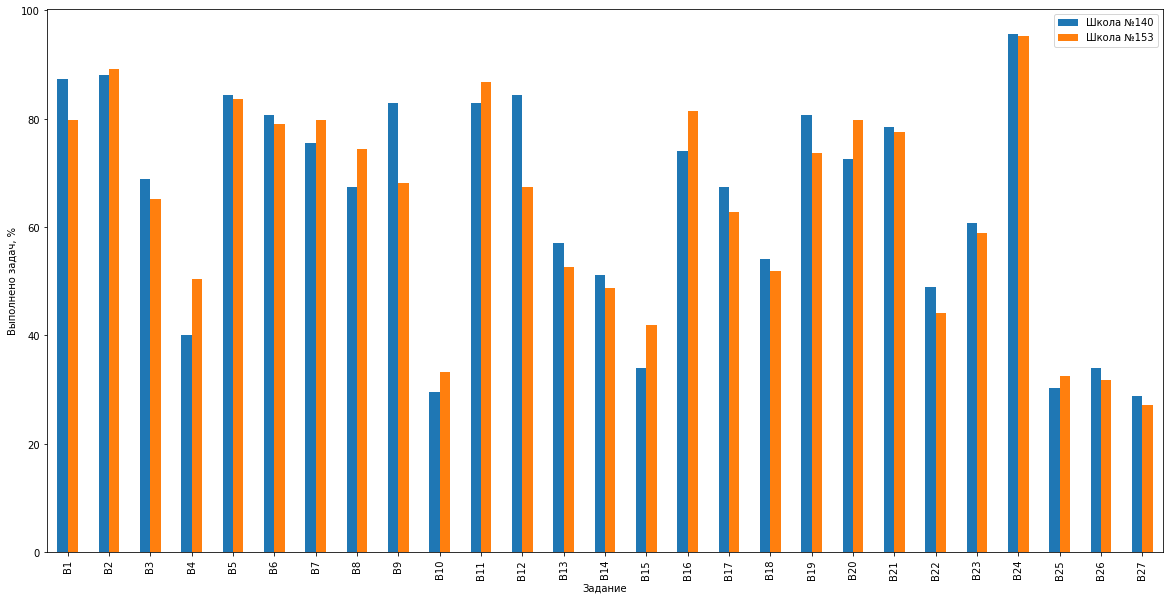

### Б) по заданиям типа С больше 50%

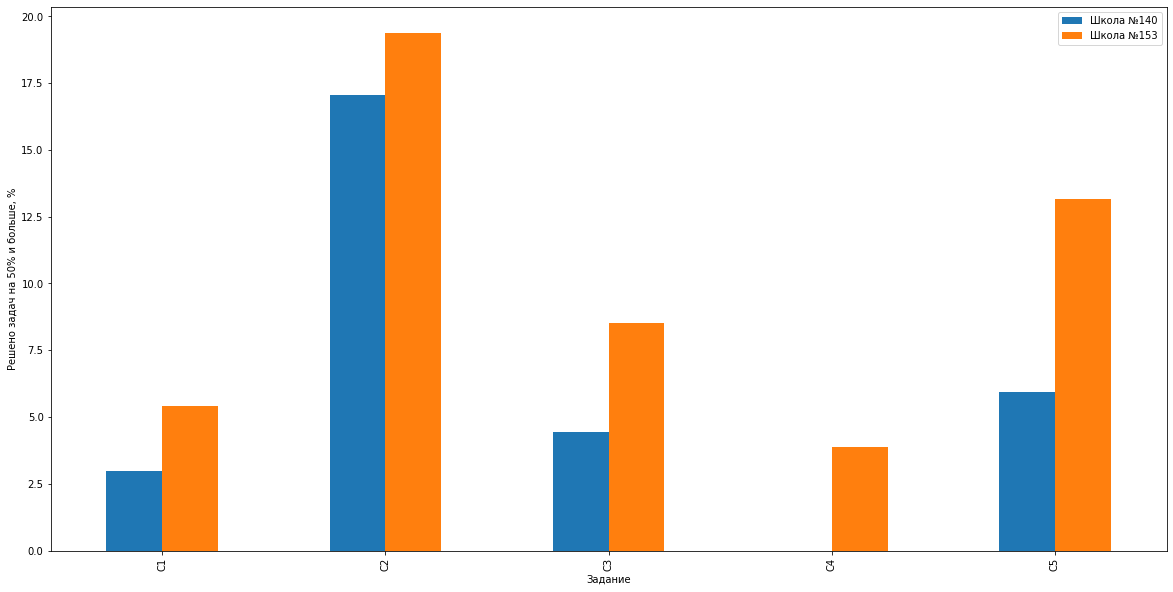

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

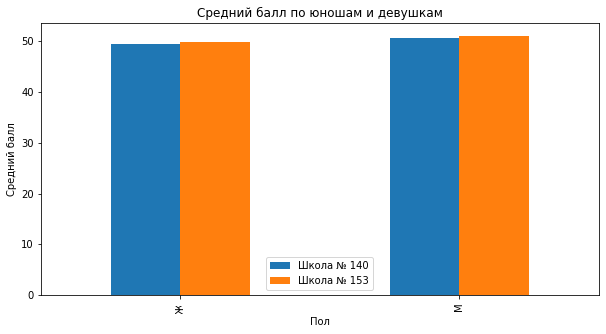